이번 주차 과제는 간단한 이미지 데이터를 활용해 크기가 큰 데이터의 차원 축소를 진행하고 데이터의 라벨에 따라 클러스터링을 진행하는 과제입니다.

###필요한 모듈을 가져오세요.

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
from torchvision import transforms
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.manifold import TSNE

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Image data 가져오기
https://www.kaggle.com/datasets/zalando-research/fashionmnist/data

###위 링크의 fashion mnist 데이터의 train dataset과 test dataset을 가져오세요.
(데이터의 용량이 크니 직접 다운로드 하지 말고 코드를 이용해 가져오도록 해보세요.)

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


###데이터에 대한 정보들을 보여주세요.
(필수: 요약, 모양, 크기, 결측치 여부 등)

In [4]:
train_one_dimensional = train_x.reshape(train_x.shape[0], -1)
test_one_dimensional = test_x.reshape(test_x.shape[0], -1)

In [5]:
df = pd.DataFrame(train_one_dimensional)
df

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,5,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,66,54,50,5,0,1,0,0,0,0


In [6]:
test_df = pd.DataFrame(test_one_dimensional)
test_df

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,2,3,0,3,174,189,67,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,164,58,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,21,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,2,0,1,1,0,0,0,...,71,12,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,31,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,27,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# 모양
df.shape

(60000, 784)

In [8]:
df.size

47040000

In [9]:
df.isnull().sum().sum()

0

### Data중 첫 번째 이미지를 보여주세요.

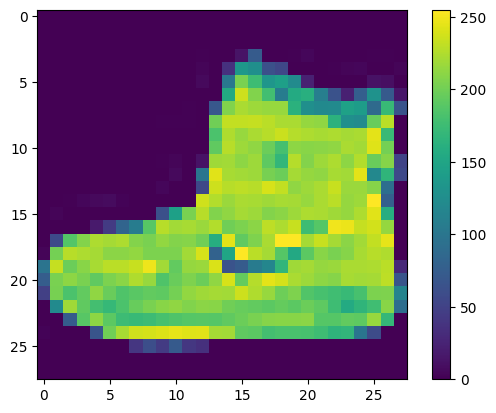

In [10]:
plt.imshow(train_x[0])
plt.colorbar()

# 이미지 전처리

### 이미지 데이터를 머신러닝에 이용하기 편한 형태로 바꾸어 합니다.
(torch model 사용 - tensor 형태로 바꾸기 등)

In [11]:
train_x_tensor = torch.tensor(train_x, dtype = torch.float32)
test_x_tensor = torch.tensor(test_x, dtype = torch.float32)

In [12]:
train_x_tensor.shape

torch.Size([60000, 28, 28])

### 이미지 데이터는 픽셀 값이 0 - 255로 이루어져 있습니다. 이 값을 0 - 1까지의 값으로 normalize 해주세요.

In [13]:
normalize = transforms.Normalize((0.1,), (1.9,))
train_x_normalized = normalize(train_x_tensor)
train_x_2d = train_x_normalized[0]
print(train_x_2d.shape)

torch.Size([28, 28])


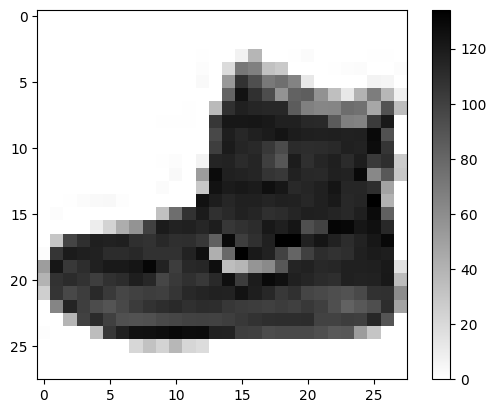

In [14]:
plt.imshow(train_x_2d, cmap = 'gray_r')
plt.colorbar()
plt.show()

### 추가적인 이미지 전처리를 진행해주세요.
(차원을 수정하는 것은 뒤의 문제에서 진행할 것이므로 여기에서 하지 마세요.)

# 차원 축소
차원 축소란 고차원 데이터를 효율적으로 처리하기 위한 기법입니다.
### 그 중 대표적인 PCA와 t-sne에 대한 내용을 비교하여 아래에 적어주세요.

- PCA는 선형적인 구조를 강조하며 비교적 단순하고 빠른 계산을 제공
- t-SNE는 비선형 구조와 국부적인 구조를 보존하며 데이터셋이 복잡할 경우 유용

## PCA

### 현재 데이터는 28*28로 784차원을 가지고 있습니다. PCA를 이용하여 데이터들을 가장 잘 설명하는 50개의 변수만으로 데이터를 변환하시오.

In [15]:
train_x_flattend = train_x_normalized.view(train_x_normalized.shape[0], -1).numpy()

In [16]:
pca = PCA(n_components = 50)
train_x_pca = pca.fit_transform(train_x_flattend)

In [17]:
train_x_flattend.shape

(60000, 784)

In [18]:
train_x_pca.shape

(60000, 50)

### PCA 이후 데이터들의 설명된 분산 비율 (explained variance ratio)를 출력하세요.

In [19]:
print(np.sum(pca.explained_variance_ratio_))

0.86264056


### PCA를 시행하면 데이터가 수정되므로 원본 데이터와 차이가 생기게 됩니다. 이때 이 차이를 재구성 오차(Reconstruction Error)라고 합니다. 재구성 오차를 mse(오차제곱합) 방식으로 구하시오.

In [20]:
trian_x_reconstructed = pca.inverse_transform(train_x_pca)

In [21]:
mse = mean_squared_error(train_x_flattend, trian_x_reconstructed)
print(mse)

215.19687


### 이번에는 PCA를 통해 원본 데이터를 30차원으로 줄이고, explained variance ratio와 reconstructon error를 구하시오.

In [22]:
pca = PCA(n_components = 30)
train_x_pca30 = pca.fit_transform(train_x_flattend)

In [23]:
train_x_pca30.shape

(60000, 30)

In [24]:
print(np.sum(pca.explained_variance_ratio_))

0.8206726


In [25]:
trian_x_reconstructed30 = pca.inverse_transform(train_x_pca30)

In [26]:
mse = mean_squared_error(train_x_flattend, trian_x_reconstructed30)
print(mse)

280.94672


### 데이터를 30차원으로 줄인 결과와 50차원으로 줄인 결과에는 어떤 차이가 있습니까?

30차원으로 줄였을 때 explained variance ratio가 더 줄어들었고, mse가 늘어났다

### 마지막으로 원본 데이터를 2차원으로 줄이고, explained variance ratio와 reconstruction error를 구하시오.

In [27]:
pca = PCA(n_components = 2)
train_x_pca2 = pca.fit_transform(train_x_flattend)

In [28]:
train_x_pca2.shape

(60000, 2)

In [29]:
print(np.sum(pca.explained_variance_ratio_))

0.46774653


In [30]:
trian_x_reconstructed2 = pca.inverse_transform(train_x_pca2)

In [31]:
mse = mean_squared_error(train_x_flattend, trian_x_reconstructed2)
print(mse)

833.8677


### 2차원으로 축소한 데이터를 시각화하여 보여주세요. 대신 데이터의 label에 따라 색상을 다르게 해주세요.

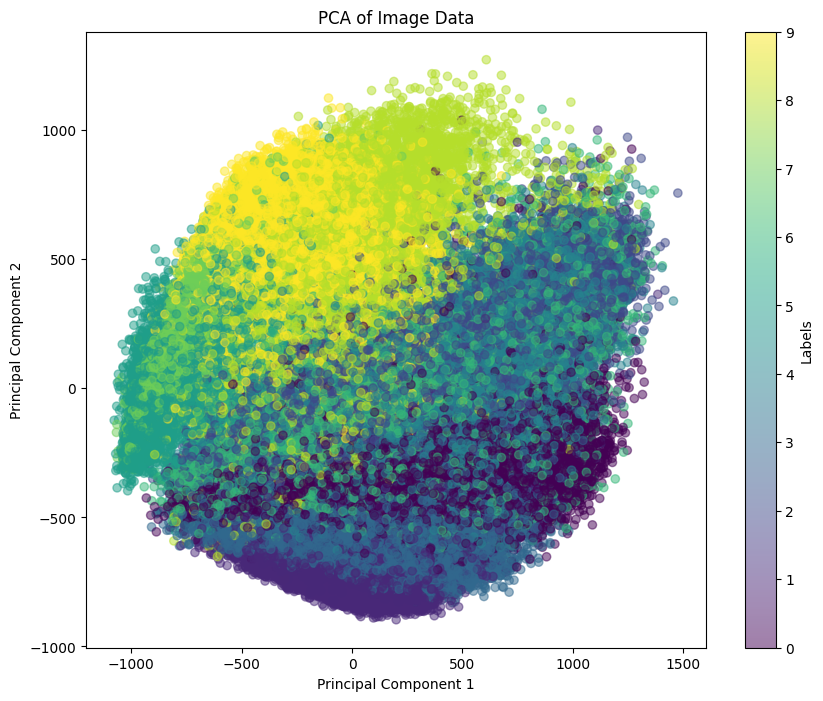

In [32]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(train_x_pca2[:, 0], train_x_pca2[:, 1], c=train_y, cmap='viridis', alpha=0.5)
plt.colorbar(scatter, label='Labels')
plt.title('PCA of Image Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

## T-SNE

### 앞서 pca를 통해 50차원으로 줄인 데이터를 t-sne를 통해 시각화 하세요.

In [ ]:
pca = PCA(n_components = 50)
train_x_pca50 = pca.fit_transform(train_x_flattend)

tsne = TSNE(n_components=2, random_state=42)
train_x_tsne = tsne.fit_transform(train_x_pca50)

In [ ]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(train_x_tsne[:, 0], train_x_tsne[:, 1], c=train_y, cmap='viridis', alpha=0.5)
plt.colorbar(scatter, label='Labels')
plt.title('t-SNE 50 of Image Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

### 앞서 pca를 통해 30차원으로 줄인 데이터를 t-sne를 통해 시각화 하세요.

In [ ]:
pca = PCA(n_components = 30)
train_x_pca30 = pca.fit_transform(train_x_flattend)

tsne = TSNE(n_components=2, random_state=42)
train_x_tsne = tsne.fit_transform(train_x_pca30)

In [ ]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(train_x_tsne[:, 0], train_x_tsne[:, 1], c=train_y, cmap='viridis', alpha=0.5)
plt.colorbar(scatter, label='Labels')
plt.title('t-SNE 30 of Image Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

## 군집화

### PCA를 통해 50차원으로 줄인 데이터를 DBSCAN을 이용하여 군집화 하시오.

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(train_x_pca50)

In [ ]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(train_x_pca50[:, 0], train_x_pca50[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.colorbar(scatter, label='Clusters')
plt.title('DBSCAN Clustering on PCA Reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

### k-means를 통해 50차원으로 줄인 데이터를 군집화 하시오.(군집의 개수는 10개로 하시오.)

In [ ]:
kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(train_x_pca50)

In [ ]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(train_x_pca50[:, 0], train_x_pca50[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.colorbar(scatter, label='Clusters')
plt.title('K-Means Clustering on PCA Reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

### 엘보우 메소드를 이용하여 k-means에서 가장 적절한 군집의 개수를 구하시오.

In [ ]:
inertia = []
k_range = range(1, 21)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(train_x_pca50)
    inertia.append(kmeans.inertia_)

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid()
plt.show()

### k-means 최적의 군집 개수로 다시 군집화 하여 시각화 하시오.

In [ ]:
k = 5
kmeans = KMeans(n_clusters = k, random_state = 42)
clusters = kmeans.fit_predict(train_x_pca)

In [ ]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(train_x_pca[:, 0], train_x_pca[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.colorbar(scatter, label='Clusters')
plt.title(f'K-Means Clustering with k={k} on PCA Reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

### 다른 추가적인 군집화 기법을 2가지 이상 사용하여 pca 50 데이터를 시각화 하시오.

## 군집화 결과 비교

### 앞선 모든 군집화 모델의 결과를 실루엣 점수(Silhouette score)를 이용하여 성능을 비교하시오.

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(train_x_pca)

if len(set(dbscan_clusters)) > 1:
    dbscan_silhouette = silhouette_score(train_x_pca, dbscan_clusters)
else:
    dbscan_silhouette = -1

In [ ]:
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans_clusters = kmeans.fit_predict(train_x_pca)
kmeans_silhouette = silhouette_score(train_x_pca, kmeans_clusters)

In [ ]:
print(f"DBSCAN Silhouette Score: {dbscan_silhouette:.4f}")
print(f"K-Means Silhouette Score: {kmeans_silhouette:.4f}")

### 실루엣 점수를 통해 군집화 모델의 성능에 대한 간단한 해석을 적으세요.


(더블클릭해서 이곳에 작성)